In [1]:
import json
import threading
import math
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt
plt.style.use('bmh')

def preprocess(data):
    time_series = list()
    for ii in data[0]:
        database = list()
        for i in ii[0]:
            database.append(list(i))
        time_series.append(database)
    return np.nan_to_num(np.array(time_series))

import warnings
warnings.simplefilter(action='ignore')

def sigificant_digit(number, digits=2):
    return round(number, digits - int(math.floor(math.log10(abs(number)))) - 1)

In [2]:
test_data = ['AtrialFibrillation', 'BasicMotions', 'CharacterTrajectories', 'Epilepsy','JapaneseVowels', 'LSST',
             'NATOPS', 'UWaveGestureLibrary', 
            ]  # 'Heartbeat', 'StandWalkJump'
test_data2 = ['AtrialFibrillation', 'BasicMotions', 'CharacterTrajectories', 'Epilepsy','JapaneseVowels', 
             'NATOPS', 'UWaveGestureLibrary', 
            ]  # 'Heartbeat', 'StandWalkJump'


###  UEA

In [3]:
_dir = 'UEA2018'

with open("results/jabba1_info1.json", 'r') as f:
    jabba1_info = json.load(f) 

with open("results/jabba2_info1.json", 'r') as f:
    jabba2_info = json.load(f) 
    
with open("results/qabba1_info1.json", 'r') as f:
    qabba1_info = json.load(f) 
    
with open("results/qabba2_info1.json", 'r') as f:
    qabba2_info = json.load(f) 

st_jabba1_center = list()
st_jabba1_str = list()
st_jabba1_other = list()
lerr_jabba1 = list()
sb_jabba1 = list()
rt_jabba1 = list()
dt_jabba1 = list()

st_jabba2_center = list()
st_jabba2_str = list()
st_jabba2_other = list()
lerr_jabba2 = list()
sb_jabba2 = list()
rt_jabba2 = list()
dt_jabba2 = list()

st_qabba1_center = list()
st_qabba1_str = list()
st_qabba1_other = list()
lerr_qabba1 = list()
sb_qabba1 = list()
rt_qabba1 = list()
dt_qabba1 = list()

st_qabba2_center = list()
st_qabba2_str = list()
st_qabba2_other = list()
lerr_qabba2 = list()
sb_qabba2 = list()
rt_qabba2 = list()
dt_qabba2 = list()


for i in range(len(test_data)):
    filename=test_data[i]
    data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TRAIN.arff')))
    multivariate_ts_train = preprocess(data)
    data = arff.loadarff(os.path.join(_dir, os.path.join(filename, filename+'_TEST.arff')))
    data = preprocess(data)
    
    size = data.shape[0]*data.shape[1]*data.shape[2] * 32
    storage_jabba1, err_jabba1, timing_jabba1, nm_symbols_jabba1, digit_timing_jabba1 = jabba1_info[i]
    storage_jabba2, err_jabba2, timing_jabba2, nm_symbols_jabba2, digit_timing_jabba2 = jabba2_info[i]
    storage_qabba1, err_qabba1, timing_qabba1, nm_symbols_qabba1, digit_timing_qabba1 = qabba1_info[i]
    storage_qabba2, err_qabba2, timing_qabba2, nm_symbols_qabba2, digit_timing_qabba2 = qabba2_info[i]

    st_jabba1_center.append(sigificant_digit(np.mean(np.array(storage_jabba1['centers']) / size) ))
    st_jabba1_str.append(sigificant_digit(np.mean(np.array(storage_jabba1['strs']) / size) ))
    st_jabba1_other.append(sigificant_digit(np.mean(np.array(storage_jabba1['others']) / size) ))

    st_jabba2_center.append(sigificant_digit(np.mean(np.array(storage_jabba2['centers']) / size) ))
    st_jabba2_str.append(sigificant_digit(np.mean(np.array(storage_jabba2['strs']) / size) ))
    st_jabba2_other.append(sigificant_digit(np.mean(np.array(storage_jabba2['others']) / size) ))
    
    st_qabba1_center.append(sigificant_digit(np.mean(np.array(storage_qabba1['centers']) / size) ))
    st_qabba1_str.append(sigificant_digit(np.mean(np.array(storage_qabba1['strs']) / size) ))
    st_qabba1_other.append(sigificant_digit(np.mean(np.array(storage_qabba1['others']) / size) ))

    st_qabba2_center.append(sigificant_digit(np.mean(np.array(storage_qabba2['centers']) / size) ))
    st_qabba2_str.append(sigificant_digit(np.mean(np.array(storage_qabba2['strs']) / size) ))
    st_qabba2_other.append(sigificant_digit(np.mean(np.array(storage_qabba2['others']) / size) ))
    
    lerr_jabba1.append(sigificant_digit(np.mean(err_jabba1)))
    sb_jabba1.append(sigificant_digit(np.mean(nm_symbols_jabba1)))
    rt_jabba1.append(sigificant_digit(np.mean(timing_jabba1)*1000))
    dt_jabba1.append(sigificant_digit(np.mean(digit_timing_jabba1)*1000))
    
    print(test_data[i], 
          "JABBA (GA) err:", lerr_jabba1[-1], 
          ", symbols used:", sb_jabba1[-1], 
          ", storage (center):", st_jabba1_center[-1], 
          ", storage (str):", st_jabba1_str[-1], 
          ", storage (other):", st_jabba1_other[-1], 
          ", digit runtime:", dt_jabba1[-1],  
          ", runtime:", rt_jabba1[-1]
    )
    
    lerr_jabba2.append(sigificant_digit(np.mean(err_jabba2)))
    sb_jabba2.append(sigificant_digit(np.mean(nm_symbols_jabba2)))
    rt_jabba2.append(sigificant_digit(np.mean(timing_jabba2)*1000))
    dt_jabba2.append(sigificant_digit(np.mean(digit_timing_jabba2)*1000))
    print(test_data[i], 
          "JABBA (VQ) err:", lerr_jabba2[-1],
          ", symbols used:", sb_jabba2[-1],  
          ", storage (center):", st_jabba2_center[-1], 
          ", storage (str):", st_jabba2_str[-1], 
          ", storage (other):", st_jabba2_other[-1], 
          ", digit runtime:", dt_jabba2[-1],  
          ", runtime:", rt_jabba2[-1]
    )
    
    lerr_qabba1.append(sigificant_digit(np.mean(err_qabba1)))
    sb_qabba1.append(sigificant_digit(np.mean(nm_symbols_qabba1)))
    rt_qabba1.append(sigificant_digit(np.mean(timing_qabba1)*1000))
    dt_qabba1.append(sigificant_digit(np.mean(digit_timing_qabba1)*1000))
    print(test_data[i], 
          "QABBA (GA) err:", lerr_qabba1[-1],
          ", symbols used:", sb_qabba1[-1],  
          ", storage (center):", st_qabba1_center[-1], 
          ", storage (str):", st_qabba1_str[-1], 
          ", storage (other):", st_qabba1_other[-1], 
          ", digit runtime:", dt_qabba1[-1],  
          ", runtime:", rt_qabba1[-1]
    )
    
    lerr_qabba2.append(sigificant_digit(np.mean(err_qabba2)))
    sb_qabba2.append(sigificant_digit(np.mean(nm_symbols_qabba2)))
    rt_qabba2.append(sigificant_digit(np.mean(timing_qabba2)*1000))
    dt_qabba2.append(sigificant_digit(np.mean(digit_timing_qabba2)*1000))
    
    print(test_data[i], 
          "QABBA (VQ) mse:", lerr_qabba2[-1],
          ", symbols used:", sb_qabba2[-1],  
          ", storage (center):", st_qabba2_center[-1], 
          ", storage (str):", st_qabba2_str[-1], 
          ", storage (other):", st_qabba2_other[-1], 
          ", digit runtime:", dt_qabba2[-1],  
          ", runtime:", rt_qabba2[-1]
    )
    print()
    
errDF = pd.DataFrame(index=test_data, columns=['ABBA', 'fABBA', 'QABBA (VQ)', 'QABBA (GA)'])
stDF_center = pd.DataFrame(index=test_data, columns=['ABBA', 'fABBA', 'QABBA (VQ)', 'QABBA (GA)'])
stDF_str = pd.DataFrame(index=test_data, columns=['ABBA', 'fABBA', 'QABBA (VQ)', 'QABBA (GA)'])
stDF_other = pd.DataFrame(index=test_data, columns=['ABBA', 'fABBA', 'QABBA (VQ)', 'QABBA (GA)'])
sbDF = pd.DataFrame(index=test_data, columns=['ABBA', 'fABBA', 'QABBA (VQ)', 'QABBA (GA)'])
dtDF = pd.DataFrame(index=test_data, columns=['ABBA', 'fABBA', 'QABBA (VQ)', 'QABBA (GA)'])
rtDF = pd.DataFrame(index=test_data, columns=['ABBA', 'fABBA', 'QABBA (VQ)', 'QABBA (GA)'])

errDF['ABBA'] = lerr_jabba2
errDF['fABBA'] = lerr_jabba1
errDF['QABBA (VQ)'] = lerr_qabba2
errDF['QABBA (GA)'] = lerr_qabba1


sbDF['ABBA'] = sb_jabba2
sbDF['fABBA'] = sb_jabba1
sbDF['QABBA (VQ)'] = sb_qabba2
sbDF['QABBA (GA)'] = sb_qabba1


dtDF['ABBA'] = dt_jabba2
dtDF['fABBA'] = dt_jabba1
dtDF['QABBA (VQ)'] = dt_qabba2
dtDF['QABBA (GA)'] = dt_qabba1

rtDF['ABBA'] = rt_jabba2
rtDF['fABBA'] = rt_jabba1
rtDF['QABBA (VQ)'] = rt_qabba2
rtDF['QABBA (GA)'] = rt_qabba1

stDF_center['ABBA'] = st_jabba2_center
stDF_center['fABBA'] = st_jabba1_center
stDF_center['QABBA (VQ)'] = st_qabba2_center
stDF_center['QABBA (GA)'] = st_qabba1_center

stDF_str['ABBA'] = st_jabba2_str
stDF_str['fABBA'] = st_jabba1_str
stDF_str['QABBA (VQ)'] = st_qabba2_str
stDF_str['QABBA (GA)'] = st_qabba1_str

stDF_other['ABBA'] = st_jabba2_other
stDF_other['fABBA'] = st_jabba1_other
stDF_other['QABBA (VQ)'] = st_qabba2_other
stDF_other['QABBA (GA)'] = st_qabba1_other


errDF.to_csv("results/errDF1.csv")
sbDF.to_csv("results/sbDF1.csv")
stDF_center.to_csv("results/stDF1_center.csv")
stDF_str.to_csv("results/stDF1_str.csv")
stDF_other.to_csv("results/stDF1_other.csv")
dtDF.to_csv("results/dtDF1.csv")
rtDF.to_csv("results/rtDF1.csv")

AtrialFibrillation JABBA (GA) err: 0.0026 , symbols used: 2200.0 , storage (center): 0.23 , storage (str): 0.046 , storage (other): 0.0016 , digit runtime: 25.0 , runtime: 200.0
AtrialFibrillation JABBA (VQ) err: 0.0026 , symbols used: 2200.0 , storage (center): 0.23 , storage (str): 0.046 , storage (other): 0.0016 , digit runtime: 7400.0 , runtime: 7500.0
AtrialFibrillation QABBA (GA) err: 0.065 , symbols used: 2200.0 , storage (center): 0.073 , storage (str): 0.046 , storage (other): 0.0017 , digit runtime: 25.0 , runtime: 170.0
AtrialFibrillation QABBA (VQ) mse: 0.065 , symbols used: 2200.0 , storage (center): 0.073 , storage (str): 0.046 , storage (other): 0.0017 , digit runtime: 8200.0 , runtime: 8400.0

BasicMotions JABBA (GA) err: 0.029 , symbols used: 2400.0 , storage (center): 0.2 , storage (str): 0.41 , storage (other): 0.0033 , digit runtime: 140.0 , runtime: 250.0
BasicMotions JABBA (VQ) err: 0.0058 , symbols used: 2400.0 , storage (center): 0.2 , storage (str): 0.41 , stor

<Figure size 1200x800 with 0 Axes>

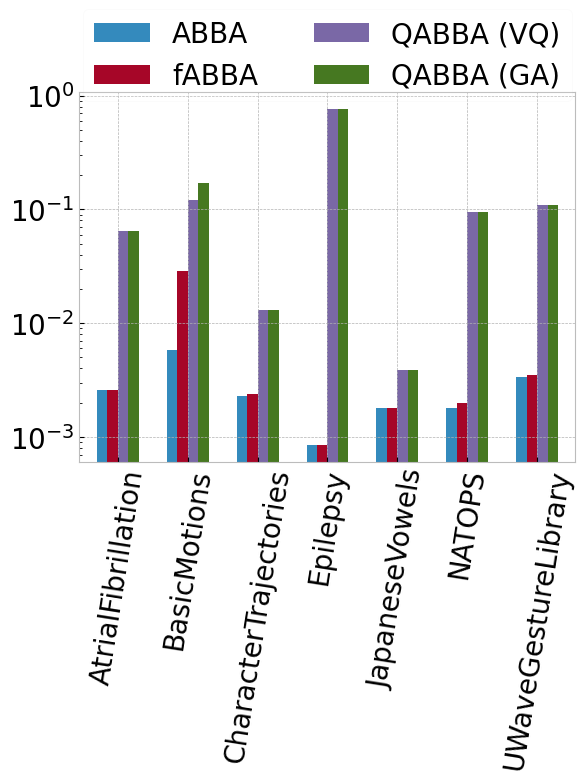

In [4]:

plt.figure(figsize=(12,8))
plt.rcParams['axes.facecolor'] = 'white'
errDF.loc[test_data2, :].plot.bar(rot=81, width=0.6, log=True, fontsize=13)
plt.legend(fontsize=20, framealpha=0.1, ncol=2, loc='center',bbox_to_anchor=(0.5, 1.1, 0, 0))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('figs/errDF1.pdf', bbox_inches='tight') 
plt.show()

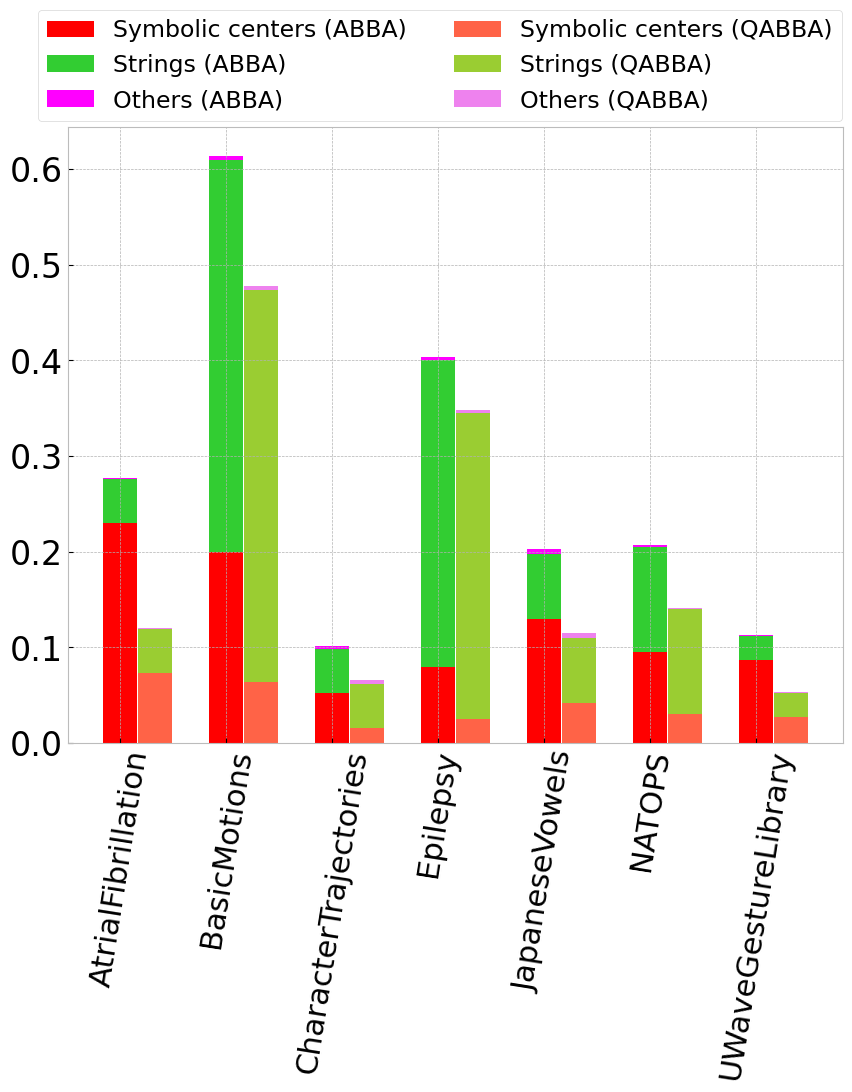

In [5]:
types = tuple(test_data2)
st_counts1 = {
    'Symbolic centers (ABBA)': stDF_center.loc[test_data2, :][['ABBA']].values.reshape(-1),
    'Strings (ABBA)': stDF_str.loc[test_data2, :][['ABBA']].values.reshape(-1),
    'Others (ABBA)': stDF_other.loc[test_data2, :][['ABBA']].values.reshape(-1),
}

st_counts2 = {
    'Symbolic centers (QABBA)': stDF_center.loc[test_data2, :][['QABBA (VQ)']].values.reshape(-1),
    'Strings (QABBA)': stDF_str.loc[test_data2, :][['QABBA (VQ)']].values.reshape(-1),
    'Others (QABBA)': stDF_other.loc[test_data2, :][['QABBA (VQ)']].values.reshape(-1),
}


width = 0.32  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(10,8))

c_width = 0.33  # the width of the bars
x = np.arange(len(types))  # the label locations



i = 0
colors = ['red', 'limegreen', 'fuchsia']
bottom = np.zeros(len(types))
for st, st_count1 in st_counts1.items():
    p = ax.bar(types, st_count1, width, label=st,bottom=bottom, color=colors[i])
    bottom += st_count1
    i = i+1
    # ax.bar_label(p, label_type='center')


i = 0
colors = ['tomato', 'yellowgreen', 'violet']
bottom = np.zeros(len(types))
for st, st_count2 in st_counts2.items():
    p = ax.bar(x + c_width, st_count2, width, label=st, bottom=bottom, color=colors[i])
    bottom += st_count2
    i = i + 1
    # ax.bar_label(p, label_type='center')
    
    
ax.set_xticklabels(types, rotation=81, fontsize=22)
ax.yaxis.set_tick_params(labelsize=24)

# ax.set_title('...')
ax.legend(ncol=2, fontsize=17, loc='center', bbox_to_anchor=(0.48, 1.1, 0, 0))
plt.savefig('figs/stDF1.pdf', bbox_inches='tight') 
plt.show()


